In [2]:
#cleaning climate_action_data.csv for AgriSmart AI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [3]:
df =pd.read_csv('climate_action_data.csv')
print(df.head())

  Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1  SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2  SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3  SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4  SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   

  Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
0  Tomatoes                          67.6                       26.6   
1     Wheat                         130.4                        8.3   
2  Tomatoes                          36.0                       29.4   
3     Maize                          85.8                       19.6   
4     Wheat                          75.6                       29.9   

  Drone_Image_ID  
0       IMG-2000  
1       IMG-2001  
2       IMG-2002  
3       IMG-2003

In [4]:
df.info()
df.dtypes
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


(913, 10)

In [97]:
print("missing values in each column:")
df.isnull().sum()

missing values in each column:


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [5]:
df.replace('error', pd.NA, inplace=True)


In [99]:
#handling missing values
categorical_cols = ['Crop_Type']
for col in categorical_cols:
    mode = df[col].mode()
    if not mode.empty:
        df[col] = df[col].fillna(mode[0])
    else:
        # If mode is empty, fill with a placeholder or leave as is
        df[col] = df[col].fillna('Unknown')
print("missing values in each column after handling:")
print(df.isnull().sum())



missing values in each column after handling:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64


In [100]:
numeric_cols =['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']
for col in numeric_cols:
    if col in df.columns:
        df[col] =pd.to_numeric(df[col], errors='coerce')
        
    

In [101]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
#filling missing dates with the mean date


In [102]:
numeric_cols = ['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']
for col in numeric_cols:
    if col in df.columns:
        mean = df[col].mean()
        std = df[col].std()
        df[col] = np.where ((df[col] < (mean - 3 * std)) | (df[col] > (mean + 3 * std)), np.nan , df[col])
        df[col] = df[col].fillna(df[col].median())
    

In [103]:
#check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 111


In [104]:
#remove duplicate rows
df = df.drop_duplicates()
print("number of rows after removing duplicates:", df.shape[0])
print("number of duplicate dates:", df['Date'].duplicated().sum())
df = df.drop_duplicates(subset=['Date'], keep='first')
df.shape

number of rows after removing duplicates: 802
number of duplicate dates: 3


(799, 10)

In [105]:
#final clean dataset
df.info()
print("missing values after all cleaning:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      799 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               799 non-null    float64       
 3   Soil_pH                        799 non-null    float64       
 4   Temperature(C)                 799 non-null    float64       
 5   Humidity(%)                    799 non-null    float64       
 6   Crop_Type                      799 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  799 non-null    float64       
 8   Irrigation_Recommended(mm)     799 non-null    float64       
 9   Drone_Image_ID                 799 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.7+ KB
missing values after all

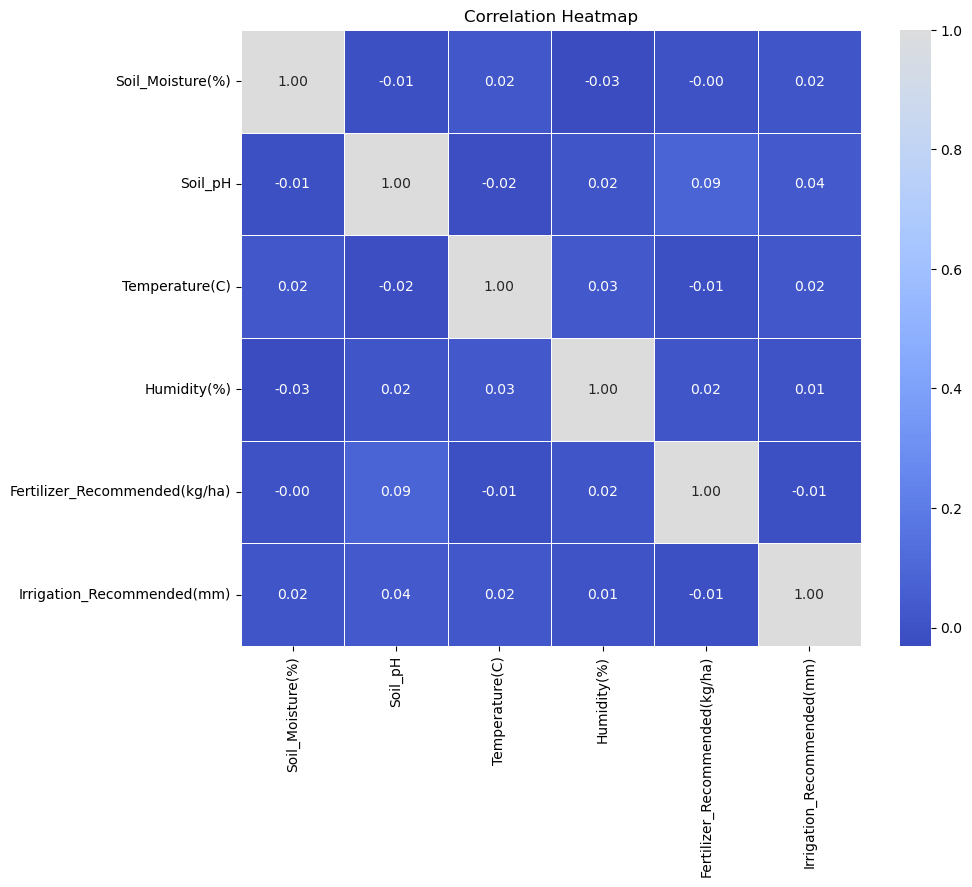

In [106]:
#Analysis
#calculate correlation matrix
corr_matrix = df[['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']].corr()
#plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,center=True)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Soil pH Distribution')

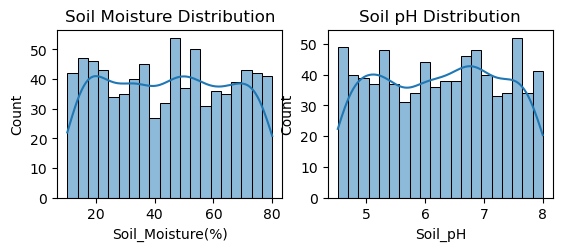

In [107]:
#histogram of soil moisture
plt.subplot(2, 2, 1)
sns.histplot(df['Soil_Moisture(%)'], bins=20, kde=True)
plt.title('Soil Moisture Distribution')
#histogram of soil pH
plt.subplot(2, 2, 2)
sns.histplot(df['Soil_pH'], bins=20, kde=True)
plt.title('Soil pH Distribution')

Text(0.5, 1.0, 'Humidity Distribution')

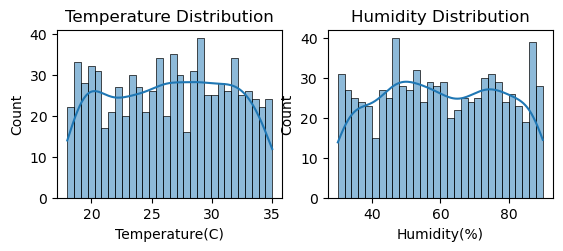

In [108]:
#Histogram of temperature
plt.subplot(2, 2, 3)
sns.histplot(df['Temperature(C)'], bins=30, kde=True)   
plt.title('Temperature Distribution')
#Histogram of humidity
plt.subplot(2, 2, 4)
sns.histplot(df['Humidity(%)'], bins=30, kde=True)
plt.title('Humidity Distribution')

Text(0.5, 1.0, 'Irrigation Recommended Distribution')

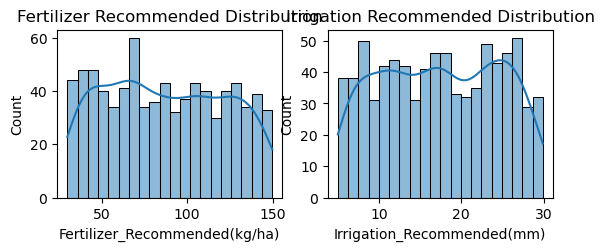

In [109]:
#histogram of fertilizer recommended
plt.subplot(2, 2, 1)
sns.histplot(df['Fertilizer_Recommended(kg/ha)'], bins=20, kde=True)
plt.title('Fertilizer Recommended Distribution')
#histogram of irrigation recommended   
plt.subplot(2, 2, 2)
sns.histplot(df['Irrigation_Recommended(mm)'], bins=20, kde=True)
plt.title('Irrigation Recommended Distribution')

In [110]:
fertilizer_corr = corr_matrix['Fertilizer_Recommended(kg/ha)']
print("Correlation with Fertilizer Recommendations:\n", fertilizer_corr)
   

Correlation with Fertilizer Recommendations:
 Soil_Moisture(%)                -0.000944
Soil_pH                          0.085333
Temperature(C)                  -0.007332
Humidity(%)                      0.017329
Fertilizer_Recommended(kg/ha)    1.000000
Irrigation_Recommended(mm)      -0.012932
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [111]:
avg_soil_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().idxmax()
print("Crop Type with Highest Average Soil Moisture:", avg_soil_moisture)
   

Crop Type with Highest Average Soil Moisture: Wheat


In [112]:
high_temp_crops = df[df['Temperature(C)'] > 30]
irrigation_adjustments = high_temp_crops[['Crop_Type', 'Irrigation_Recommended(mm)']]
print(irrigation_adjustments)
   

    Crop_Type  Irrigation_Recommended(mm)
7     Lettuce                         6.4
10      Maize                         9.3
16      Maize                         6.6
19      Wheat                        16.3
23      Maize                        15.3
..        ...                         ...
779     Maize                        12.6
780  Tomatoes                        22.9
781     Beans                        14.0
782     Maize                        11.7
794   Lettuce                         9.4

[227 rows x 2 columns]


In [113]:
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)
# Save the cleaned dataset
print("Cleaned dataset saved as 'cleaned_precision_agriculture_data.csv'")

Cleaned dataset saved as 'cleaned_precision_agriculture_data.csv'


In [114]:
#insights
#The correlation heatmap indicates which environmental factors most influence fertilizer recommendations.
#The crop type with the highest average soil moisture can help in understanding which crops require more water.




#recommendations
#Adjust irrigation practices for crops experiencing average temperatures above 30°C to prevent stress and optimize growth.
#Regularly monitor soil moisture and pH levels to ensure optimal conditions for crop growth.